In [1]:
import quandl
import pandas as pd
import mykey

quandl.ApiConfig.api_key = mykey.key

M2_data = quandl.get("FRED/M2", start_date="1981-01-01", end_date="2019-01-01")

CPI_data = quandl.get("FRED/CPIAUCSL", start_date="1981-01-01", end_date="2019-01-01")

#UNEMPL_data = quandl.get("FRED/UNRATE", start_date="1981-01-01", end_date="2019-01-01")

#INFL_data = quandl.get("FRED/FPCPITOTLZGUSA", start_date="1981-01-01", end_date="2019-01-01")

In [2]:
M2_data.head()
#UNEMPL_data.head()
#INFL_data.head()

,Value
Date,
1981-01-05,1596.6
1981-01-12,1600.1
1981-01-19,1606.8
1981-01-26,1609.4
1981-02-02,1608.6


In [3]:
import numpy as np
import hvplot.pandas


In [4]:
M2_data.hvplot()
#UNEMPL_data.hvplot()
#INFL_data.hvplot()

:Curve   [Date]   (Value)

In [5]:
CPI_data.hvplot()

:Curve   [Date]   (Value)

In [6]:
M2_data.shape


(1983, 1)

In [7]:
CPI_data.shape


(457, 1)

In [8]:
M2_data.head()

,Value
Date,
1981-01-05,1596.6
1981-01-12,1600.1
1981-01-19,1606.8
1981-01-26,1609.4
1981-02-02,1608.6


In [9]:
CPI_data.head()

,Value
Date,
1981-01-01,87.2
1981-02-01,88.0
1981-03-01,88.6
1981-04-01,89.1
1981-05-01,89.7


In [10]:
dates = pd.date_range('1981-01-01', '2019-01-01', freq='d')

In [11]:
dates

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', length=13880, freq='D')

In [12]:
import numpy as np

M2_norm = (M2_data - M2_data.mean()) / (M2_data.max() - M2_data.min())
CPI_norm = (CPI_data - CPI_data.mean()) / (CPI_data.max() - CPI_data.min())
#UNEMPL_norm = (UNEMPL_data - UNEMPL_data.mean()) / (UNEMPL_data.max() - UNEMPL_data.min())
#INFL_norm = (INFL_data - INFL_data.mean()) / (INFL_data.max() - INFL_data.min())

M2_norm.index = pd.DatetimeIndex(M2_norm.index)
CPI_norm.index = pd.DatetimeIndex(CPI_norm.index)
#UNEMPL_norm.index = pd.DatetimeIndex(UNEMPL_norm.index)
#INFL_norm.index = pd.DatetimeIndex(INFL_norm.index)

M2_norm = M2_norm.reindex(dates, fill_value=np.nan)
CPI_norm = CPI_norm.reindex(dates, fill_value=np.nan)
#UNEMPL_norm = UNEMPL_norm.reindex(dates, fill_value=np.nan)
#INFL_norm = INFL_norm.reindex(dates, fill_value=np.nan)

M2_norm.columns = ['M2']
CPI_norm.columns = ['CPI']
#UNEMPL_norm.columns = ['UNEMPL']
#INFL_norm.columns = ['INFL']

combined_data = pd.concat([M2_norm, CPI_norm], axis=1,join='outer',join_axes=None,
ignore_index=False, names = ["M2", "CPI"])

In [13]:


CPI_norm.head(45)
M2_norm.head(45)
#INFL_norm.head(45)

,M2
1981-01-01,NaN
1981-01-02,NaN
1981-01-03,NaN
1981-01-04,NaN
1981-01-05,-0.338272
1981-01-06,NaN
1981-01-07,NaN
1981-01-08,NaN
1981-01-09,NaN
1981-01-10,NaN


In [14]:


#combined_data = combined_data.replace('NaN', np.nan)
#ombined_data = combined_data.replace(np.nan, 0)
combined_data.index = pd.DatetimeIndex(combined_data.index)

combined_data


,M2,CPI
1981-01-01,NaN,-0.509799
1981-01-02,NaN,NaN
1981-01-03,NaN,NaN
1981-01-04,NaN,NaN
1981-01-05,-0.338272,NaN
1981-01-06,NaN,NaN
1981-01-07,NaN,NaN
1981-01-08,NaN,NaN
1981-01-09,NaN,NaN
1981-01-10,NaN,NaN


In [15]:
combined_data.dropna(how='all')

,M2,CPI
1981-01-01,NaN,-0.509799
1981-01-05,-0.338272,NaN
1981-01-12,-0.337999,NaN
1981-01-19,-0.337477,NaN
1981-01-26,-0.337274,NaN
1981-02-01,NaN,-0.504968
1981-02-02,-0.337336,NaN
1981-02-09,-0.336915,NaN
1981-02-16,-0.336533,NaN
1981-02-23,-0.336190,NaN


In [16]:
combined_data.dropna(how='all')

,M2,CPI
1981-01-01,NaN,-0.509799
1981-01-05,-0.338272,NaN
1981-01-12,-0.337999,NaN
1981-01-19,-0.337477,NaN
1981-01-26,-0.337274,NaN
1981-02-01,NaN,-0.504968
1981-02-02,-0.337336,NaN
1981-02-09,-0.336915,NaN
1981-02-16,-0.336533,NaN
1981-02-23,-0.336190,NaN


In [17]:
combined_data.dropna().hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [18]:
combined_data.dropna()

,M2,CPI
1981-06-01,-0.332854,-0.489871
1982-02-01,-0.324513,-0.464507
1982-03-01,-0.324100,-0.464507
1982-11-01,-0.316273,-0.444579
1983-08-01,-0.301306,-0.431898
1984-10-01,-0.287064,-0.401703
1985-04-01,-0.277936,-0.390229
1985-07-01,-0.273672,-0.386002
1986-09-01,-0.255306,-0.372113
1986-12-01,-0.251167,-0.367282


In [19]:
combined_data.loc['1985':'1987']

,M2,CPI
1985-01-01,NaN,-0.39808
1985-01-02,NaN,NaN
1985-01-03,NaN,NaN
1985-01-04,NaN,NaN
1985-01-05,NaN,NaN
1985-01-06,NaN,NaN
1985-01-07,-0.281654,NaN
1985-01-08,NaN,NaN
1985-01-09,NaN,NaN
1985-01-10,NaN,NaN


In [20]:
M2_data.hvplot()

:Curve   [Date]   (Value)

In [21]:
M2_data.rolling(3)



Rolling [window=3,center=False,axis=0]

In [22]:
M2_data.rolling(10).mean()

,Value
Date,
1981-01-05,NaN
1981-01-12,NaN
1981-01-19,NaN
1981-01-26,NaN
1981-02-02,NaN
1981-02-09,NaN
1981-02-16,NaN
1981-02-23,NaN
1981-03-02,NaN


In [23]:
M2_data.rolling(200).mean().hvplot()

:Curve   [Date]   (Value)

In [24]:
import statsmodels as sm
#ts_noise, ts_trend = sm.tsa.filters.hpfilter(M2_data)

In [25]:
#ts_noise.hvplot()

In [26]:
#ts_trend.hvplot()

In [27]:
M2_norm['M2'].autocorr(lag=6)

nan

In [28]:
M2_norm['M2'].dropna().autocorr(lag=6)

0.9999593856204979

In [34]:
import matplotlib.pyplot as plt
import statsmodels as sm
#sm.graphics.tsaplots.plot_acf(M2_data, lags=48)
#help(sm)

In [35]:
M2_data.hvplot()

:Curve   [Date]   (Value)

In [37]:
#sm.graphics.tsaplots.plot_pacf(M2_data, lags=48, zero=False)

In [38]:
from statsmodels.tsa.stattools import adfuller
adfuller(M2_norm["M2"].pct_change().dropna())

(-19.754880987635435,
 0.0,
 34,
 13840,
 {'1%': -3.4308225804390147,
  '5%': -2.8617488588247033,
  '10%': -2.5668811707342796},
 -60141.82506454225)

In [39]:
M2_norm.dropna().pct_change().hvplot()

:Curve   [index]   (M2)

In [40]:
M2_norm.dropna().hvplot()

:Curve   [index]   (M2)

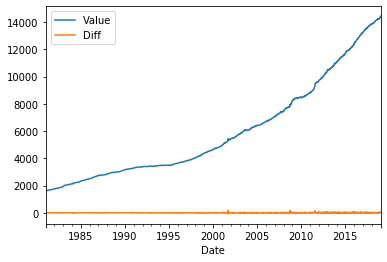

In [41]:
M2_data["Diff"] = M2_data.diff()
M2_data.dropna().plot()

M2_data_diff = M2_data[M2_data["Diff"] != 0]

In [42]:
M2_data_diff = M2_data[M2_data["Diff"] != 0]

In [43]:
M2_data_diff = M2_data_diff.replace(np.inf, np.nan).replace(-np.inf, np.nan)
M2_data_diff = M2_data_diff.dropna()

In [44]:
M2_data_diff['Log'] = np.log(M2_data_diff['Diff'])
M2_data_diff = M2_data_diff.dropna()
M2_data_diff['Log'].hvplot()

C:\Users\mhugman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


:Curve   [Date]   (Log)

In [45]:
M2_data_diff["div"] = M2_data_diff["Diff"] / M2_data_diff["Log"]


In [46]:
pd.reset_option('precision')
M2_data_diff

,Value,Diff,Log,div
Date,,,,
1981-01-12,1600.1,3.5,1.252763,2.793825
1981-01-19,1606.8,6.7,1.902108,3.522409
1981-01-26,1609.4,2.6,0.955511,2.721056
1981-02-09,1614.0,5.4,1.686399,3.202089
1981-02-16,1618.9,4.9,1.589235,3.083244
1981-02-23,1623.3,4.4,1.481605,2.969753
1981-03-02,1626.1,2.8,1.029619,2.719451
1981-03-09,1630.5,4.4,1.481605,2.969753
1981-03-16,1636.2,5.7,1.740466,3.274985


In [47]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(M2_data_diff["Log"], order=(2,2))
results = model.fit()

C:\Users\mhugman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mhugman\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [48]:
results

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    Log   No. Observations:                 1510
Model:                     ARMA(2, 2)   Log Likelihood               -1996.978
Method:                       css-mle   S.D. of innovations              0.907
Date:                Mon, 23 Sep 2019   AIC                           4005.956
Time:                        21:03:02   BIC                           4037.876
Sample:                             0   HQIC                          4017.843
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8269      0.522      3.502      0.000       0.805       2.849
ar.L1.Log      1.7559      0.003    597.453      0.000       1.750       1.762
ar.L2.Log     -0.7560      0.003   -257.453      0.000      -0.762      -0.750
ma.L1.Log     -1.6644      0.019    -86.202      0.000      -1.702      -1.627
ma.L2.Log      0.6707      0.019     34.946      0.000       0.633       0.708
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           +0.0000j            1.0007            0.0000
AR.2            1.3218           +0.0000j            1.3218            0.0000
MA.1            1.0205           +0.0000j            1.0205            0.0000
MA.2            1.4610           +0.0000j            1.4610            0.0000
-----------------------------------------------------------------------------
"""

In [50]:
from arch import arch_model
model = arch_model(M2_data_diff["Log"], mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                    Log   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -3168.39
Distribution:                  Normal   AIC:                           6342.78
Method:            Maximum Likelihood   BIC:                           6358.74
                                        No. Observations:                 1510
Date:                Mon, Sep 23 2019   Df Residuals:                     1507
Time:                        21:03:03   Df Model:                            3
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      7.1778e-03  2.134e-02      0.336      0.737 [-3.464e-02,4.900e-02]
alpha[1]       0.0455  6.960e-02      0.654      0.513   [-9.087e-02,  0.182]
beta[1]        0.9537  7.418e-02     12.856  7.934e-38      [  0.808,  1.099]
=============================================================================

Covariance estimator: robust
"""

In [51]:
print("hello")

hello
